In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data_train.csv")

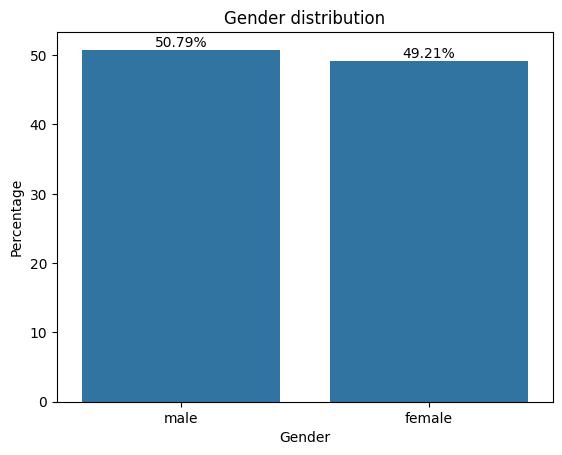

In [155]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax = sns.countplot(data=data, x = "gender", stat = "percent")
labels = [f"{p.get_height():.2f}%" for p in ax.containers[0]]
ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title("Gender distribution")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage");


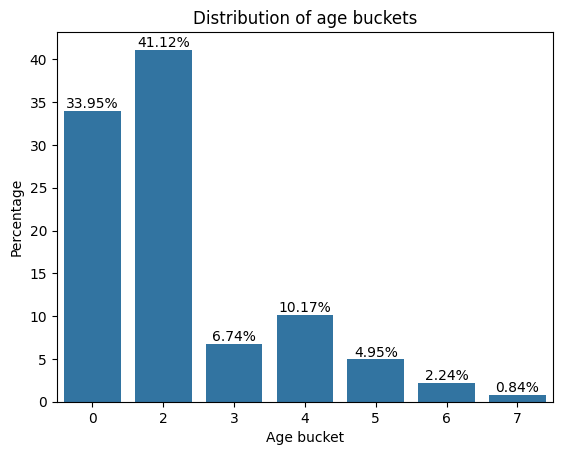

In [157]:
fig,ax = plt.subplots()
ax = sns.countplot(data=data, x = "age", stat = "percent")
labels = [f"{p.get_height():.2f}%" for p in ax.containers[0]]
ax.bar_label(container=ax.containers[0], labels = labels)
ax.set_title("Distribution of age buckets")
ax.set_xlabel("Age bucket");
ax.set_ylabel("Percentage");
plt.show()

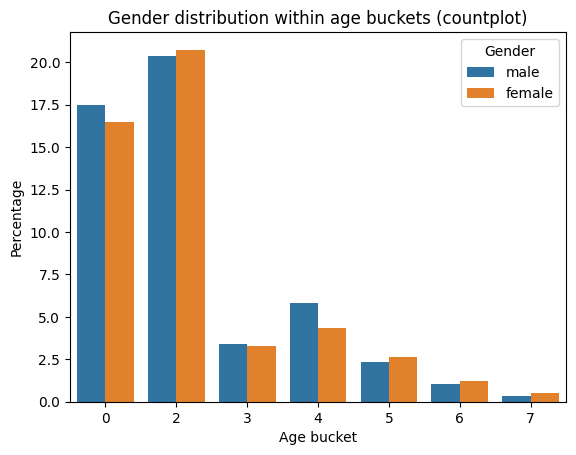

In [164]:
fig,ax = plt.subplots()
ax = sns.countplot(data = data, x = 'age', hue = 'gender', stat = 'percent')

ax.set_title("Gender distribution within age buckets (countplot)")
ax.set_ylabel("Percentage")
ax.legend(title="Gender")
ax.set_xlabel("Age bucket");

In [158]:
counts  = pd.crosstab(index = data["age"], columns = data["gender"])
percentages = counts.div(counts.sum(axis=1), axis=0)*100 #covert to percentages

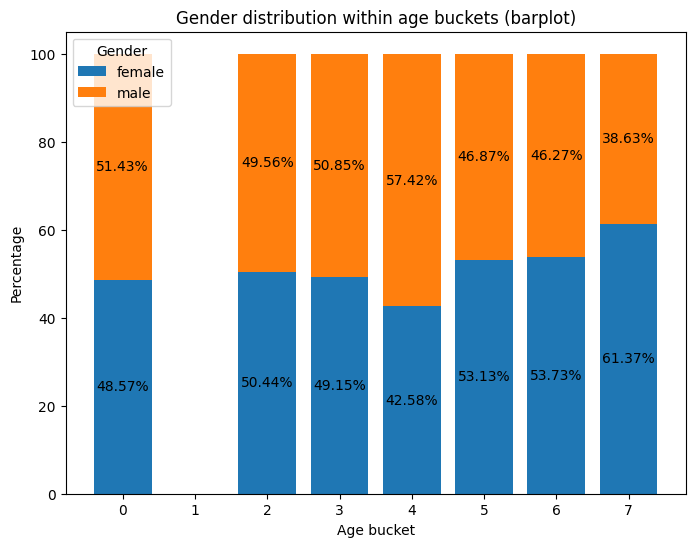

In [160]:
import numpy as np

fig,ax = plt.subplots(figsize=(8, 6))
bottom = np.zeros(len(counts))

for gender in percentages.columns:
    p = ax.bar(percentages.index, percentages[gender], bottom=bottom, label=gender,)
    bottom += percentages[gender].values
    labels = [f"{bar.get_height():.2f}%" for bar in p]
    ax.bar_label(p, label_type='center', labels=labels)

ax.set_ylabel("Percentage")
ax.set_xlabel("Age bucket")
ax.legend(title="Gender")
ax.set_title("Gender distribution within age buckets (barplot)")
plt.show()

In [133]:
from scipy.stats import chi2_contingency

#is age independent of gender?
contingency = pd.crosstab(data["age"], data["gender"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"P-value: {p}")

P-value: 0.0
